<a href="https://colab.research.google.com/github/shibata-shunsuke/q-macro/blob/main/0514homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

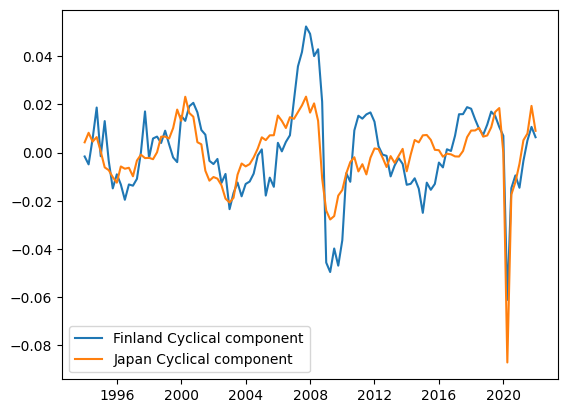

Cycle mean: 0.01875186112337939
Cycle standard deviation: 0.013585130866049691
Covariance between Finland and Japan cycles: 0.00017922155674280097


In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# "GDPC1" should be edditted into "NAEXKP01JPQ657S"
# set the start and end dates for the data
start_date = '1994-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp_finland = web.DataReader('NAEXKP01FIQ189S', 'fred', start_date, end_date)
log_gdp_finland = np.log(gdp_finland)

# calculate the quarterly percent change in real GDP for Finland
gdp_pct_change_finland = gdp_finland.pct_change(4)

# apply a Hodrick-Prescott filter to the Finland GDP data to extract the cyclical component
cycle_finland, trend_finland = sm.tsa.filters.hpfilter(log_gdp_finland, lamb=1600)

# download Japan GDP data
gdp_japan = web.DataReader('GDPC1', 'fred', start_date, end_date)
log_gdp_japan = np.log(gdp_japan)

# calculate the quarterly percent change in real GDP for JAPAN
gdp_pct_change_japan = gdp_japan.pct_change(4)

# apply a Hodrick-Prescott filter to the Japan GDP data to extract the cyclical component
cycle_japan, trend_japan = sm.tsa.filters.hpfilter(log_gdp_japan, lamb=1600)

# Plot the cyclical components for both countries
plt.plot(cycle_finland, label="Finland Cyclical component")
plt.plot(cycle_japan, label="Japan Cyclical component")

# Add a legend and show the plot
plt.legend()
plt.show()


cycle_finland_std = cycle_finland.std()
cycle_japan_std = cycle_japan.std()

print("Cycle mean:", cycle_finland_std)
print("Cycle standard deviation:", cycle_japan_std)

covariance = np.cov(cycle_finland, cycle_japan)[0, 1]
print("Covariance between Finland and Japan cycles:", covariance)